In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# concentrate Ebike data and E4 data in one csv file 
df1 = pd.read_csv("export_EBikedata.csv")
df2 = pd.read_csv("bpm_data.csv")
df3 = pd.read_csv("eda_data.csv")




## EBike + BPM

merged_bpm = df1.merge(df2, on="time", how="outer").fillna("")
merged_bpm.replace("", np.nan, inplace=True)            
merged_bpm.dropna(axis=0, how='any',inplace=True)
print(merged_bpm)
#merged.to_csv("merged.csv", index=False)

gp_bpm = merged_bpm.groupby(by=['D5_humanPower','d5_bpm'])
gp_bpm = gp_bpm.size().reset_index(name='frequence')
# probabilities 
gp_bpm['frequence'] /= len(merged_bpm)
merged_bpm = merged_bpm.merge(gp_bpm, on=['D5_humanPower','d5_bpm'], how="outer").fillna("")
merged_bpm.to_csv("merged_bpm.csv", index=False)





## Ebike + EDA

merged_eda = df1.merge(df3, on="time", how="outer").fillna("")
merged_eda.replace("", np.nan, inplace=True)            
merged_eda.dropna(axis=0, how='any',inplace=True)
print(merged_eda)
#merged.to_csv("merged.csv", index=False)

gp_eda = merged_eda.groupby(by=['D5_humanPower','d005_EDA'])
gp_eda = gp_eda.size().reset_index(name='frequence')
# probabilities 
gp_eda['frequence'] /= len(merged_eda)
merged_eda = merged_eda.merge(gp_eda, on=['D5_humanPower','d005_EDA'], how="outer").fillna("")
merged_eda.to_csv("merged_eda.csv", index=False)

                 time  average_humanPower  D5_humanPower  \
0    2019-07-26-21-03          100.000000           20.0   
1    2019-07-26-21-04          115.000000           23.0   
2    2019-07-26-21-05           61.000000           12.0   
3    2019-07-26-21-06           64.000000           13.0   
4    2019-07-26-21-07           58.000000           12.0   
5    2019-07-26-21-08          137.000000           27.0   
6    2019-07-26-21-09          137.000000           27.0   
7    2019-07-26-21-10          118.000000           24.0   
8    2019-07-26-21-11           97.000000           19.0   
9    2019-07-26-21-12           78.000000           16.0   
10   2019-07-26-21-13          103.000000           21.0   
11   2019-07-26-21-14          120.000000           24.0   
12   2019-07-26-21-15           55.000000           11.0   
13   2019-07-26-21-16           87.000000           17.0   
14   2019-07-26-21-17          112.000000           22.0   
15   2019-07-26-21-18          115.00000

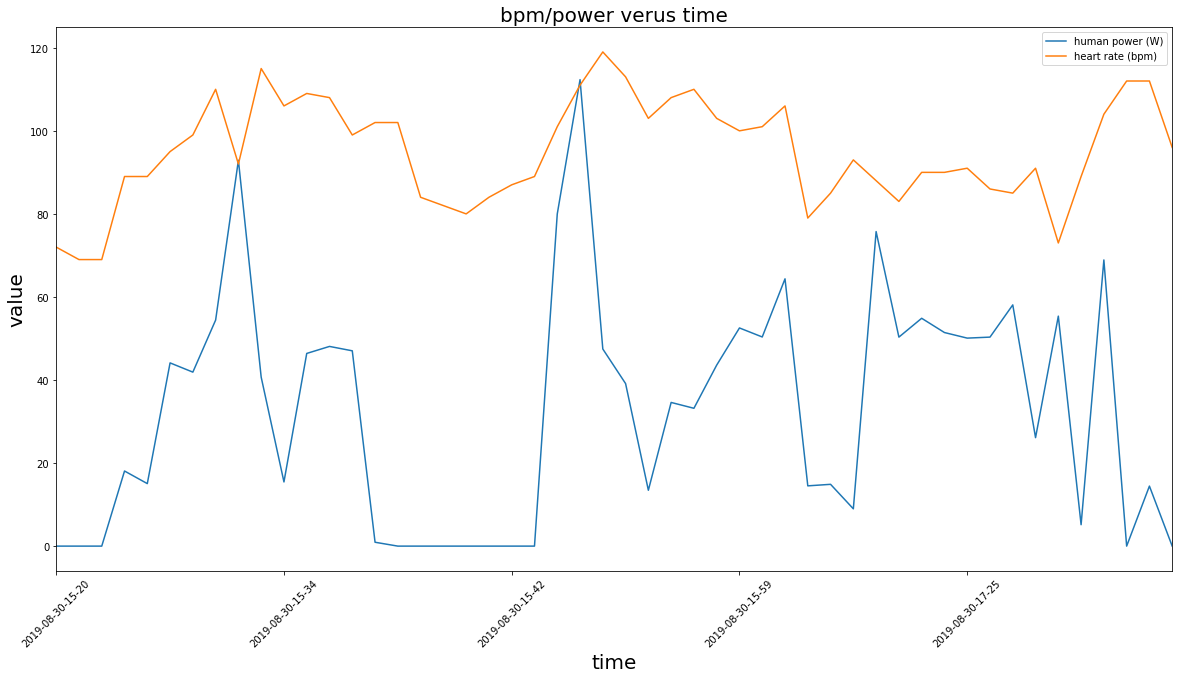

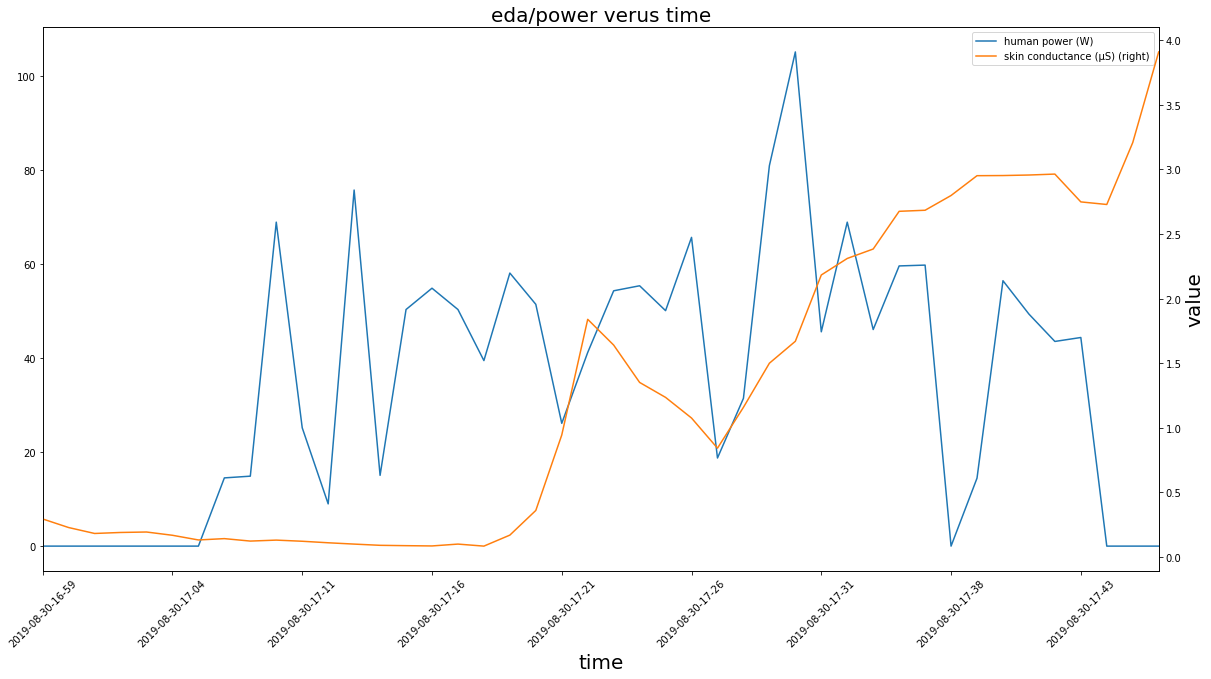

In [4]:
# 2d plot

# bpm/power verus time

merged_bpm.plot(x="time", y=["average_humanPower", "bpm"],label = ["human power (W)", "heart rate (bpm)"],figsize = (20,10))
#ax = merged_bpm.plot(x="time", y="average_humanPower",label = "human power",figsize = (20,10))
#merged_bpm.plot("time","bpm",label = "bpm",secondary_y=True, ax=ax)

plt.tick_params(axis='x', rotation=45)
plt.title('bpm/power verus time',fontsize=20)
plt.xlabel('time',fontsize=20)
plt.ylabel('value',fontsize=20)

plt.show()

# eda/power verus time

#merged_eda.plot(x="time", y=["average_humanPower", "aveEDA"],label = ["human power", "eda"],figsize = (20,10),secondary_y=True)
ax = merged_eda.plot(x="time", y="average_humanPower",label = "human power (W)",figsize = (20,10))
merged_eda.plot("time","aveEDA",label = "skin conductance (μS)",secondary_y=True, ax=ax)


ax.tick_params(axis='x', rotation=45)
ax.xaxis.label.set_size(20)

plt.title('eda/power verus time',fontsize=20)
plt.xlabel('time')
plt.ylabel('value',fontsize=20)


plt.show()

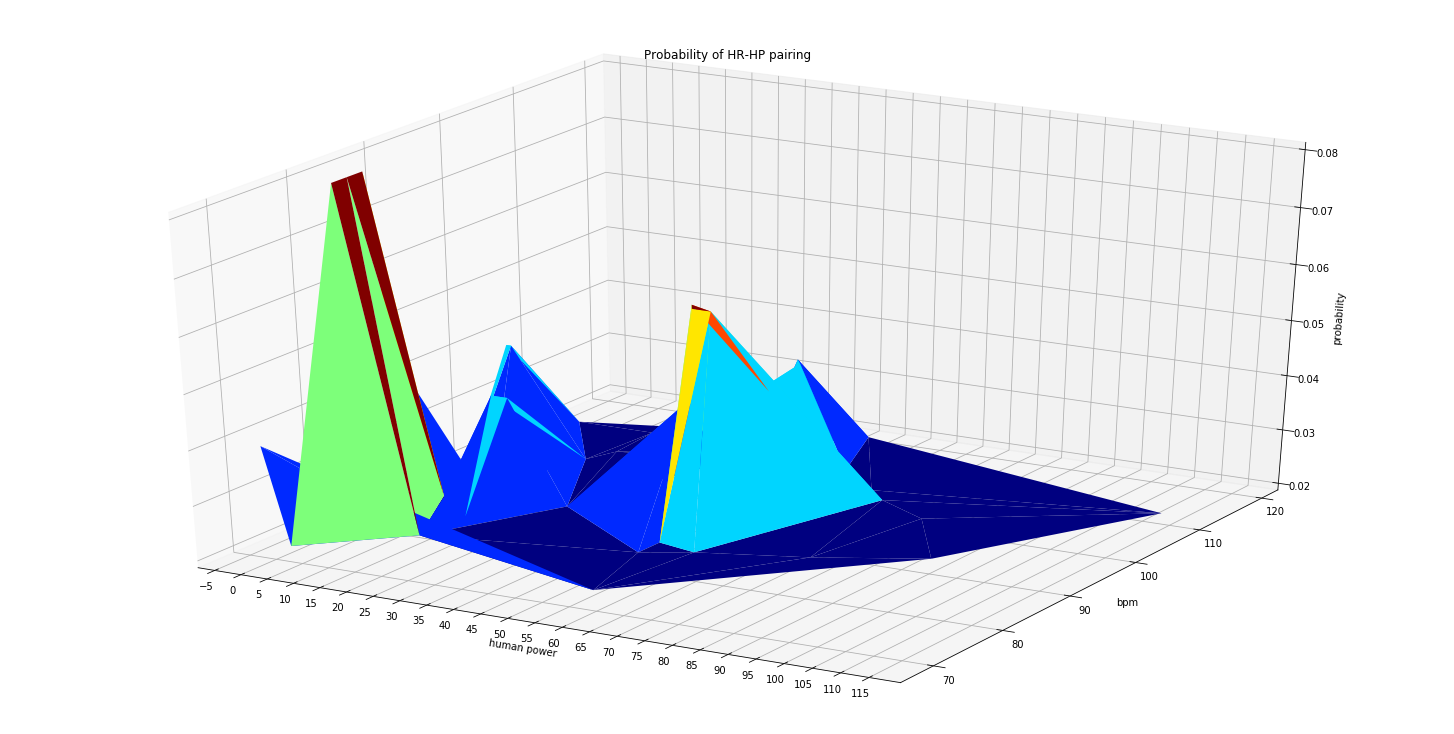

In [22]:
# 3d Plot trisurf
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test,azim = -60)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.plot_trisurf(merged_bpm.average_humanPower, merged_bpm.bpm,merged_bpm.frequence, cmap=cm.jet, linewidth=0.2)

plt.title('Probability of HR-HP pairing')
test_ax.set_xlabel('human power')
test_ax.set_ylabel('bpm')
test_ax.set_zlabel('probability')

test_ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()

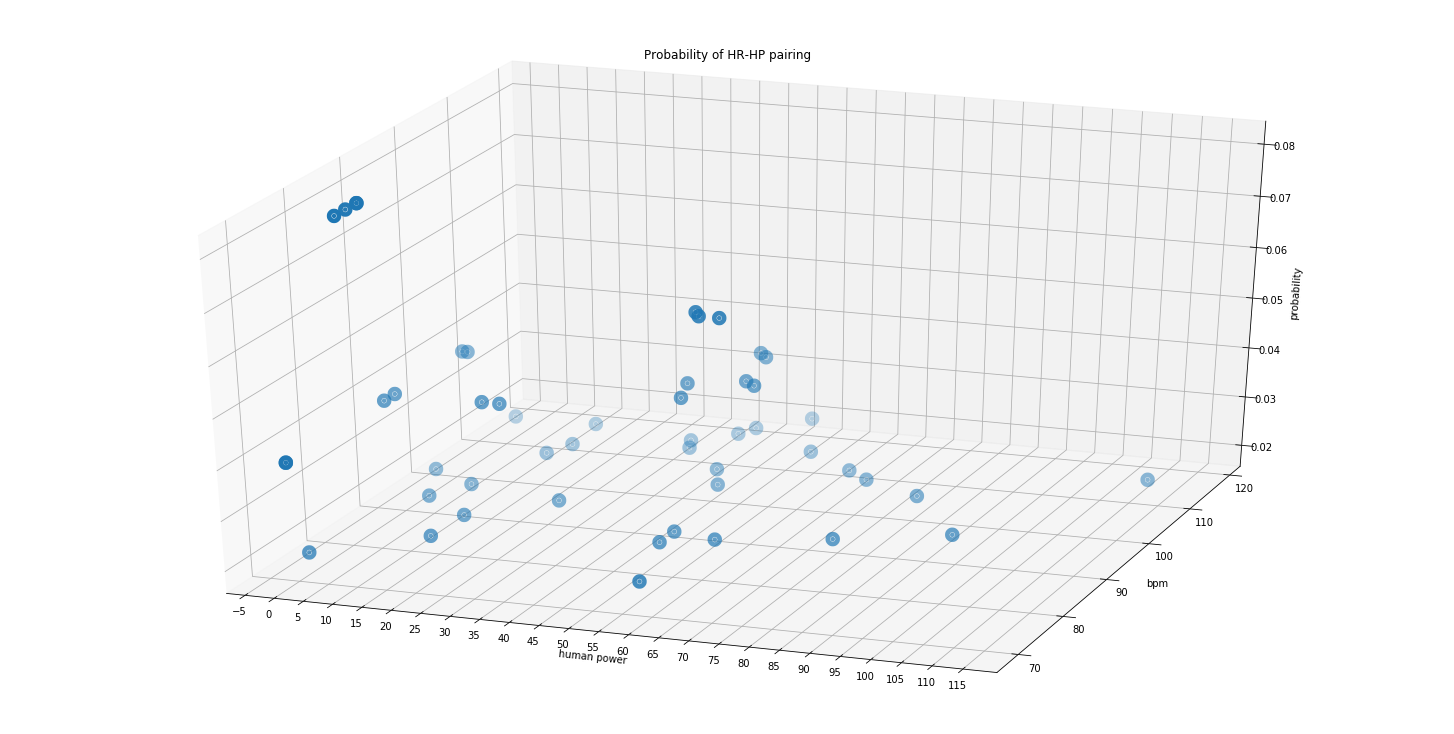

In [8]:
# 3d Plot scatter
# Approach 1
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test,azim = -70)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.scatter(merged_bpm.average_humanPower, merged_bpm.bpm,merged_bpm.frequence, cmap=plt.cm.rainbow, linewidth=10)

plt.title('Probability of HR-HP pairing')
test_ax.set_xlabel('human power')
test_ax.set_ylabel('bpm')
test_ax.set_zlabel('probability')

test_ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()

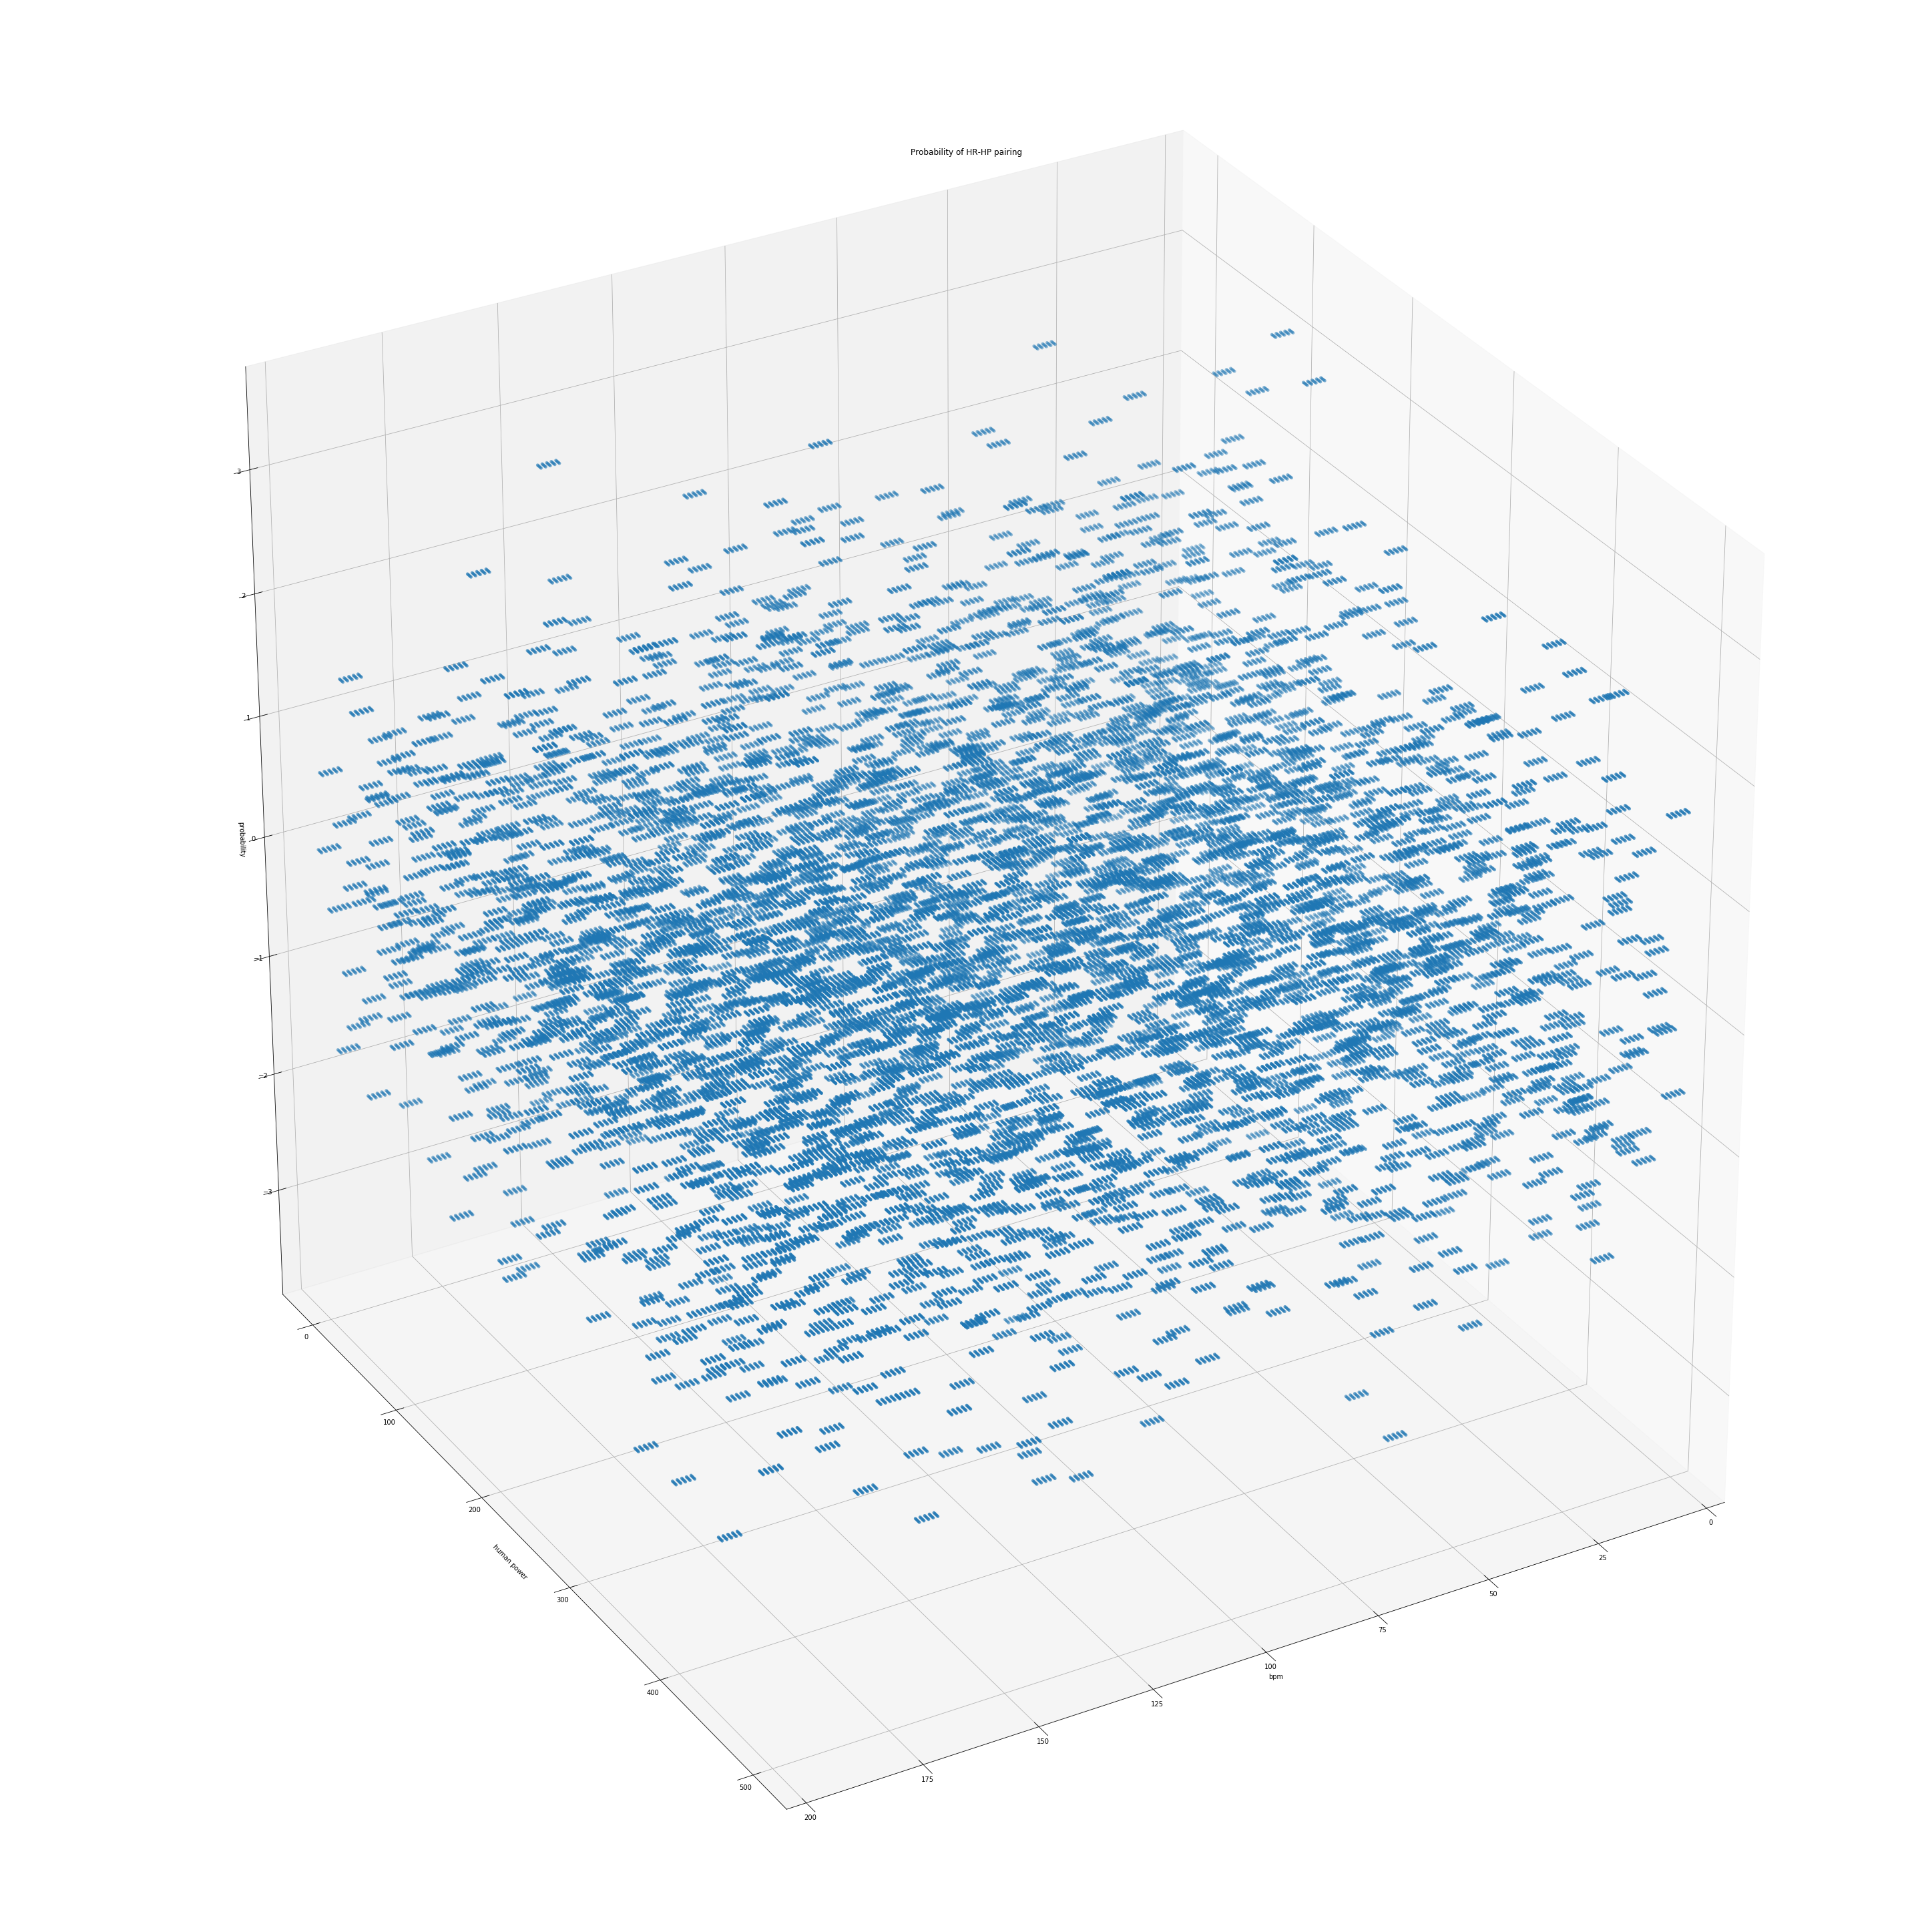

In [32]:
# 3d Plot scatter
# Approach 2
#https://blog.csdn.net/yanyanyufei96/article/details/70171887
a = np.arange(0,10000,1).reshape(100,100)
a = np.random.randn(100,100)
np.savetxt('trytry.csv',a,delimiter = ',')
#print(a)
Matrix = np.zeros((500,500))
for n in range(0,40):
    for nn in range(0,100):
        for i in range(0,5):
            for j in range(0,5):
                Matrix[nn*5+j,n*5+i] = a[nn,n]
#print(Matrix)
df = pd.DataFrame(Matrix)
df.loc[:,200:].replace(0, np.nan, inplace=True)
#print(df)

y = df.index.values
x = df.columns.values
X,Y = np.meshgrid(x,y)
Z = Y*0+X*0+df.loc[df.index.values,df.columns[df.index.values]]

fig = plt.figure(figsize = (40,40))
axes3d = Axes3D(fig,azim = 60)

#axes3d.plot_surface(X, Y, Z,cmap=plt.cm.rainbow)
axes3d.scatter(X, Y, Z, cmap=plt.cm.rainbow, linewidth=0.2)
              
axes3d.set_xlabel('bpm')
axes3d.set_ylabel('human power')
axes3d.set_zlabel('probability')
plt.title('Probability of HR-HP pairing')
#axes3d.xaxis.set_major_locator(MultipleLocator(5))


plt.xlim(0, 200)
plt.show()

In [35]:
import os
import csv
with open("PairsProbabilityba.csv", "a", newline='') as f:
    headers = ['D5_humanPower','d5_bpm']
    writer = csv.writer(f)

    if not os.path.getsize("PairsProbabilityba.csv"):         
        # print('no headers')
        writer.writerow(headers) # file doesn't exist yet, write a header

    for i in range(100):
        for j in range(100):
            writer.writerow([i,j])

    f.close()
    
df4 = pd.read_csv("PairsProbabilityba.csv")
merged_all = df4.merge(gp_bpm, on=['D5_humanPower','d5_bpm'], how="outer").fillna(np.nan)
merged_all.to_csv("PairsProbabilityba.csv", index=False)

In [37]:
b = merged_all['frequence'].as_matrix().reshape(100,100)

C:\Users\temp2015\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

C:\Users\temp2015\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


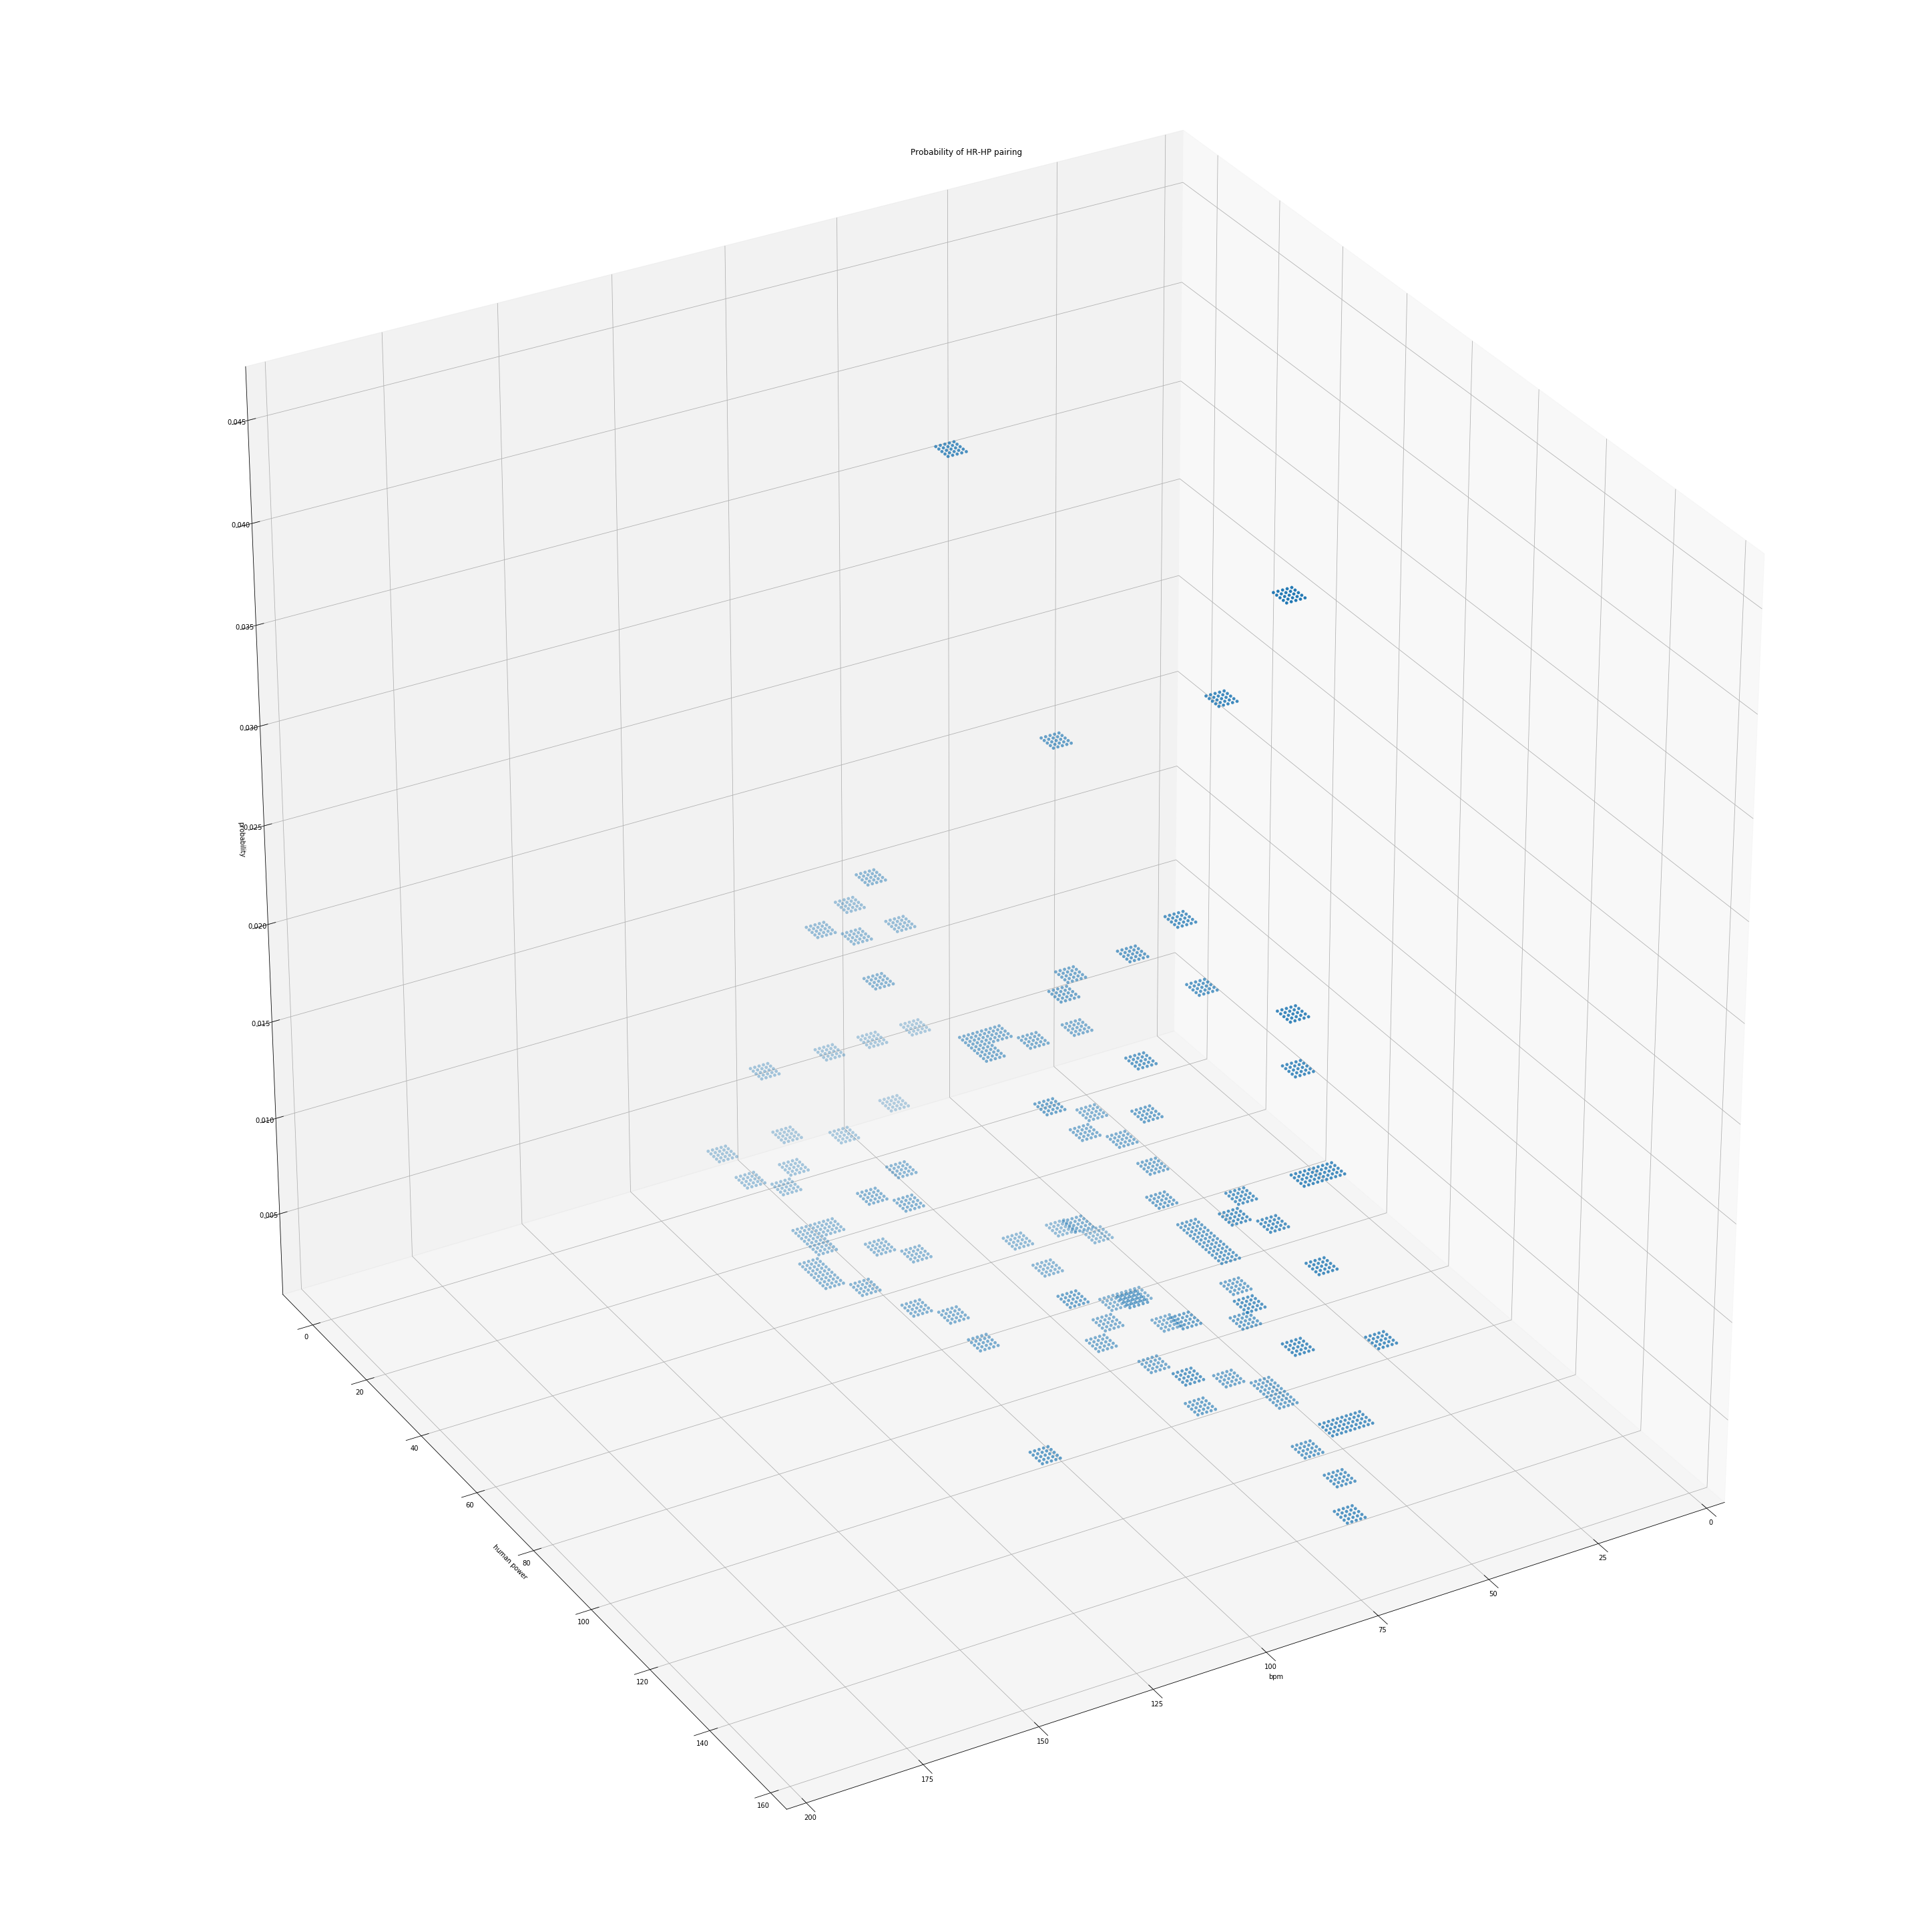

In [38]:
Matrix = np.zeros((500,500))
for n in range(0,40):
    for nn in range(0,100):
        for i in range(0,5):
            for j in range(0,5):
                Matrix[nn*5+j,n*5+i] = b[nn,n]
#print(Matrix)
df = pd.DataFrame(Matrix)
df.loc[:,200:].replace(0, np.nan, inplace=True)
#print(df)

y = df.index.values
x = df.columns.values
X,Y = np.meshgrid(x,y)
Z = Y*0+X*0+df.loc[df.index.values,df.columns[df.index.values]]

fig = plt.figure(figsize = (40,40))
axes3d = Axes3D(fig,azim = 60)

#axes3d.plot_surface(X, Y, Z,cmap=plt.cm.rainbow)
axes3d.scatter(X, Y, Z, cmap=plt.cm.rainbow, linewidth=0.2)
              
axes3d.set_xlabel('bpm')
axes3d.set_ylabel('human power')
axes3d.set_zlabel('probability')
plt.title('Probability of HR-HP pairing')
#axes3d.xaxis.set_major_locator(MultipleLocator(5))


plt.xlim(0, 200)
plt.show()